In [439]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Finding missing data

In [440]:
missing_values = ['Unknown','UNKNOWN', np.nan]

In [441]:
data = pd.read_csv('/MS/DataMining/Project/mvc.csv',na_values=missing_values)

In [442]:
data.head()

Year          Crash Descriptor   Time        Date Day of Week  \
0  2014           Injury Accident   5:35  06/18/2014   Wednesday   
1  2014  Property Damage Accident  15:28  11/06/2014    Thursday   
2  2014  Property Damage Accident  15:27  03/19/2014   Wednesday   
3  2014  Property Damage Accident   4:03  06/23/2014      Monday   
4  2014  Property Damage Accident  15:28  09/27/2014    Saturday   

  Police Report  Lighting Conditions Municipality Collision Type Descriptor  \
0             Y                 Dawn     NEW YORK                     OTHER   
1             Y             Daylight    HENRIETTA               RIGHT ANGLE   
2             Y             Daylight       CICERO                OVERTAKING   
3             Y  Dark-Road Unlighted   COLESVILLE                     OTHER   
4             Y             Daylight       HECTOR                     OTHER   

  County Name     Road Descriptor Weather Conditions Traffic Control Device  \
0    NEW YORK  Straight and Level              Clear                   None   
1      MONROE  Straight and Level               Rain                   None   
2    ONONDAGA  Straight and Level             Cloudy                   None   
3      BROOME  Straight and Grade              Clear                   None   
4    SCHUYLER  Straight and Level             Cloudy                   None   

  Road Surface Conditions DOT Reference Marker Location  \
0                     Dry                           NaN   
1                     Wet                           NaN   
2                     Dry                           NaN   
3                     Dry                   88I91011017   
4                     Dry                   79 63061019   

        Pedestrian Bicyclist Action                     Event Descriptor  \
0  Crossing, No Signal or Crosswalk           Pedestrian, Collision With   
1                    Not Applicable  Other Motor Vehicle, Collision With   
2                    Not Applicable  Other Motor Vehicle, Collision With   
3                    Not Applicable                                 Deer   
4                    Not Applicable                                 Deer   

   Number of Vehicles Involved  
0                            1  
1                            2  
2                            2  
3                            1  
4                            1

In [443]:
import pandas_profiling as pp

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895916 entries, 0 to 895915
Data columns (total 18 columns):
Year                             895916 non-null int64
Crash Descriptor                 895916 non-null object
Time                             895916 non-null object
Date                             895916 non-null object
Day of Week                      895916 non-null object
Police Report                    895916 non-null object
Lighting Conditions              828215 non-null object
Municipality                     883939 non-null object
Collision Type Descriptor        825171 non-null object
County Name                      893656 non-null object
Road Descriptor                  828899 non-null object
Weather Conditions               828465 non-null object
Traffic Control Device           815897 non-null object
Road Surface Conditions          829323 non-null object
DOT Reference Marker Location    313601 non-null object
Pedestrian Bicyclist Action      886830 non-null o

In [444]:
data.isnull().sum()

Year                                  0
Crash Descriptor                      0
Time                                  0
Date                                  0
Day of Week                           0
Police Report                         0
Lighting Conditions               67701
Municipality                      11977
Collision Type Descriptor         70745
County Name                        2260
Road Descriptor                   67017
Weather Conditions                67451
Traffic Control Device            80019
Road Surface Conditions           66593
DOT Reference Marker Location    582315
Pedestrian Bicyclist Action        9086
Event Descriptor                   1170
Number of Vehicles Involved           0
dtype: int64

In [445]:
data.shape

(895916, 18)

# handling missing values of lighting_conditions column

In [446]:
data.columns =[column.replace(" ", "_") for column in data.columns]

In [447]:
data.columns

Index(['Year', 'Crash_Descriptor', 'Time', 'Date', 'Day_of_Week',
       'Police_Report', 'Lighting_Conditions', 'Municipality',
       'Collision_Type_Descriptor', 'County_Name', 'Road_Descriptor',
       'Weather_Conditions', 'Traffic_Control_Device',
       'Road_Surface_Conditions', 'DOT_Reference_Marker_Location',
       'Pedestrian_Bicyclist_Action', 'Event_Descriptor',
       'Number_of_Vehicles_Involved'],
      dtype='object')

In [448]:
data['temp_datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

data['hour'] = data['temp_datetime'].dt.hour

In [449]:
data.dtypes

Year                                      int64
Crash_Descriptor                         object
Time                                     object
Date                                     object
Day_of_Week                              object
Police_Report                            object
Lighting_Conditions                      object
Municipality                             object
Collision_Type_Descriptor                object
County_Name                              object
Road_Descriptor                          object
Weather_Conditions                       object
Traffic_Control_Device                   object
Road_Surface_Conditions                  object
DOT_Reference_Marker_Location            object
Pedestrian_Bicyclist_Action              object
Event_Descriptor                         object
Number_of_Vehicles_Involved               int64
temp_datetime                    datetime64[ns]
hour                                      int64
dtype: object

In [450]:
data['hour'] = data['hour'].apply(str)

In [451]:
data.dtypes

Year                                      int64
Crash_Descriptor                         object
Time                                     object
Date                                     object
Day_of_Week                              object
Police_Report                            object
Lighting_Conditions                      object
Municipality                             object
Collision_Type_Descriptor                object
County_Name                              object
Road_Descriptor                          object
Weather_Conditions                       object
Traffic_Control_Device                   object
Road_Surface_Conditions                  object
DOT_Reference_Marker_Location            object
Pedestrian_Bicyclist_Action              object
Event_Descriptor                         object
Number_of_Vehicles_Involved               int64
temp_datetime                    datetime64[ns]
hour                                     object
dtype: object

In [452]:
def get_drive_mode(x):
    light_con = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    else:                 
        return data['hour'].mode() # Otherwise return dataset's mode for the 'drive' feature.

Light_cond_mode = data.groupby(['hour'])['Lighting_Conditions'].apply(get_drive_mode).reset_index().drop('level_1', axis=1)
Light_cond_mode.rename(columns={'Lighting_Conditions': 'Lighting_Conditions_mode'}, inplace=True)

In [453]:
Light_cond_mode

hour Lighting_Conditions_mode
0     0        Dark-Road Lighted
1     1        Dark-Road Lighted
2    10                 Daylight
3    11                 Daylight
4    12                 Daylight
5    13                 Daylight
6    14                 Daylight
7    15                 Daylight
8    16                 Daylight
9    17                 Daylight
10   18                 Daylight
11   19        Dark-Road Lighted
12    2        Dark-Road Lighted
13   20        Dark-Road Lighted
14   21        Dark-Road Lighted
15   22        Dark-Road Lighted
16   23        Dark-Road Lighted
17    3        Dark-Road Lighted
18    4        Dark-Road Lighted
19    5        Dark-Road Lighted
20    6                 Daylight
21    7                 Daylight
22    8                 Daylight
23    9                 Daylight

In [454]:
def fill_with_mode(x):
    if pd.isnull(x['Lighting_Conditions']):
        return Light_cond_mode[(Light_cond_mode['hour'] == x['hour'])]['Lighting_Conditions_mode'].values[0]
    else:
        return x['Lighting_Conditions']

In [455]:
data['Lighting_Conditions'] = data.apply((lambda x: fill_with_mode(x)), axis=1)


In [456]:
data.isnull().sum()

Year                                  0
Crash_Descriptor                      0
Time                                  0
Date                                  0
Day_of_Week                           0
Police_Report                         0
Lighting_Conditions                   0
Municipality                      11977
Collision_Type_Descriptor         70745
County_Name                        2260
Road_Descriptor                   67017
Weather_Conditions                67451
Traffic_Control_Device            80019
Road_Surface_Conditions           66593
DOT_Reference_Marker_Location    582315
Pedestrian_Bicyclist_Action        9086
Event_Descriptor                   1170
Number_of_Vehicles_Involved           0
temp_datetime                         0
hour                                  0
dtype: int64

# forward filling all null values

In [457]:
data.fillna(method='ffill',inplace=True)

In [458]:
data.isnull().sum()

Year                             0
Crash_Descriptor                 0
Time                             0
Date                             0
Day_of_Week                      0
Police_Report                    0
Lighting_Conditions              0
Municipality                     0
Collision_Type_Descriptor        0
County_Name                      0
Road_Descriptor                  0
Weather_Conditions               0
Traffic_Control_Device           0
Road_Surface_Conditions          0
DOT_Reference_Marker_Location    3
Pedestrian_Bicyclist_Action      0
Event_Descriptor                 0
Number_of_Vehicles_Involved      0
temp_datetime                    0
hour                             0
dtype: int64

In [459]:
data[data['DOT_Reference_Marker_Location'].isnull()]

Year          Crash_Descriptor   Time        Date Day_of_Week  \
0  2014           Injury Accident   5:35  06/18/2014   Wednesday   
1  2014  Property Damage Accident  15:28  11/06/2014    Thursday   
2  2014  Property Damage Accident  15:27  03/19/2014   Wednesday   

  Police_Report Lighting_Conditions Municipality Collision_Type_Descriptor  \
0             Y                Dawn     NEW YORK                     OTHER   
1             Y            Daylight    HENRIETTA               RIGHT ANGLE   
2             Y            Daylight       CICERO                OVERTAKING   

  County_Name     Road_Descriptor Weather_Conditions Traffic_Control_Device  \
0    NEW YORK  Straight and Level              Clear                   None   
1      MONROE  Straight and Level               Rain                   None   
2    ONONDAGA  Straight and Level             Cloudy                   None   

  Road_Surface_Conditions DOT_Reference_Marker_Location  \
0                     Dry                           NaN   
1                     Wet                           NaN   
2                     Dry                           NaN   

        Pedestrian_Bicyclist_Action                     Event_Descriptor  \
0  Crossing, No Signal or Crosswalk           Pedestrian, Collision With   
1                    Not Applicable  Other Motor Vehicle, Collision With   
2                    Not Applicable  Other Motor Vehicle, Collision With   

   Number_of_Vehicles_Involved       temp_datetime hour  
0                            1 2014-06-18 05:35:00    5  
1                            2 2014-11-06 15:28:00   15  
2                            2 2014-03-19 15:27:00   15

In [460]:
data.head(20000).to_csv("clean_accident.csv")

In [461]:
data.drop('temp_datetime', axis=1, inplace=True)

In [462]:
data.drop('hour', axis=1, inplace=True)

In [463]:
data.head(20000).to_csv("clean_accident2.csv")

In [464]:
data = pd.read_csv('/Users/sandhyaranikairam/DataMining/clean_accident2.csv',na_values=missing_values)

In [465]:
data.isnull().sum()

Unnamed: 0                       0
Year                             0
Crash_Descriptor                 0
Time                             0
Date                             0
Day_of_Week                      0
Police_Report                    0
Lighting_Conditions              0
Municipality                     0
Collision_Type_Descriptor        0
County_Name                      0
Road_Descriptor                  0
Weather_Conditions               0
Traffic_Control_Device           0
Road_Surface_Conditions          0
DOT_Reference_Marker_Location    3
Pedestrian_Bicyclist_Action      0
Event_Descriptor                 0
Number_of_Vehicles_Involved      0
dtype: int64

In [466]:
train_data = data.query('Year=="2014"')

In [467]:
train_data.Year.unique()

array([2014])

In [468]:
test_data = data.query('Year=="2015"')

In [469]:
test_data.Year.unique()

array([], dtype=int64)

In [470]:
target = train_data['Crash_Descriptor']

In [471]:
train_data.Municipality.unique().size

1099

# Converting categorical data to int

In [472]:
data.head()

Unnamed: 0  Year          Crash_Descriptor   Time        Date Day_of_Week  \
0           0  2014           Injury Accident   5:35  06/18/2014   Wednesday   
1           1  2014  Property Damage Accident  15:28  11/06/2014    Thursday   
2           2  2014  Property Damage Accident  15:27  03/19/2014   Wednesday   
3           3  2014  Property Damage Accident   4:03  06/23/2014      Monday   
4           4  2014  Property Damage Accident  15:28  09/27/2014    Saturday   

  Police_Report  Lighting_Conditions Municipality Collision_Type_Descriptor  \
0             Y                 Dawn     NEW YORK                     OTHER   
1             Y             Daylight    HENRIETTA               RIGHT ANGLE   
2             Y             Daylight       CICERO                OVERTAKING   
3             Y  Dark-Road Unlighted   COLESVILLE                     OTHER   
4             Y             Daylight       HECTOR                     OTHER   

  County_Name     Road_Descriptor Weather_Conditions Traffic_Control_Device  \
0    NEW YORK  Straight and Level              Clear                   None   
1      MONROE  Straight and Level               Rain                   None   
2    ONONDAGA  Straight and Level             Cloudy                   None   
3      BROOME  Straight and Grade              Clear                   None   
4    SCHUYLER  Straight and Level             Cloudy                   None   

  Road_Surface_Conditions DOT_Reference_Marker_Location  \
0                     Dry                           NaN   
1                     Wet                           NaN   
2                     Dry                           NaN   
3                     Dry                   88I91011017   
4                     Dry                   79 63061019   

        Pedestrian_Bicyclist_Action                     Event_Descriptor  \
0  Crossing, No Signal or Crosswalk           Pedestrian, Collision With   
1                    Not Applicable  Other Motor Vehicle, Collision With   
2                    Not Applicable  Other Motor Vehicle, Collision With   
3                    Not Applicable                                 Deer   
4                    Not Applicable                                 Deer   

   Number_of_Vehicles_Involved  
0                            1  
1                            2  
2                            2  
3                            1  
4                            1

In [473]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
data['Crash_Descriptor'] = labelencoder_X.fit_transform(data['Crash_Descriptor'])
data['Lighting_Conditions'] = labelencoder_X.fit_transform(data['Lighting_Conditions'])
data['Collision_Type_Descriptor'] = labelencoder_X.fit_transform(data['Collision_Type_Descriptor'])
data['Road_Descriptor'] = labelencoder_X.fit_transform(data['Road_Descriptor'])
data['Weather_Conditions'] = labelencoder_X.fit_transform(data['Weather_Conditions'])
data['Road_Surface_Conditions'] = labelencoder_X.fit_transform(data['Road_Surface_Conditions'])
data['Event_Descriptor'] = labelencoder_X.fit_transform(data['Event_Descriptor'])


In [474]:
numericdata = data[['Event_Descriptor','Weather_Conditions','Road_Descriptor','Collision_Type_Descriptor',
                    'Lighting_Conditions','Crash_Descriptor','Road_Surface_Conditions','Number_of_Vehicles_Involved']]

In [475]:
numericdata.head()

Event_Descriptor  Weather_Conditions  Road_Descriptor  \
0                25                   0                4   
1                20                   4                4   
2                20                   1                4   
3                 8                   0                3   
4                 8                   1                4   

   Collision_Type_Descriptor  Lighting_Conditions  Crash_Descriptor  \
0                          3                    2                 1   
1                          6                    3                 3   
2                          4                    3                 3   
3                          3                    1                 3   
4                          3                    3                 3   

   Road_Surface_Conditions  Number_of_Vehicles_Involved  
0                        0                            1  
1                        6                            2  
2                        0                            2  
3                        0                            1  
4                        0                            1

# Random Forest

In [476]:
X = numericdata.drop('Crash_Descriptor', axis=1)
y =  numericdata['Crash_Descriptor']

In [477]:
X.head()

Event_Descriptor  Weather_Conditions  Road_Descriptor  \
0                25                   0                4   
1                20                   4                4   
2                20                   1                4   
3                 8                   0                3   
4                 8                   1                4   

   Collision_Type_Descriptor  Lighting_Conditions  Road_Surface_Conditions  \
0                          3                    2                        0   
1                          6                    3                        6   
2                          4                    3                        0   
3                          3                    1                        0   
4                          3                    3                        0   

   Number_of_Vehicles_Involved  
0                            1  
1                            2  
2                            2  
3                            1  
4                            1

In [512]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.43, random_state=77)

In [517]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=1200)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [518]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [519]:
rfc_cv_score = cross_val_score(rfc, X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [520]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[   2   10    2   11]
 [   1  606   86 1099]
 [   1   70  187 1386]
 [   0  124  269 4746]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        25
           1       0.75      0.34      0.47      1792
           2       0.34      0.11      0.17      1644
           3       0.66      0.92      0.77      5139

    accuracy                           0.64      8600
   macro avg       0.56      0.36      0.39      8600
weighted avg       0.61      0.64      0.59      8600



=== All AUC Scores ===
[0.64667067 0.63986801 0.64231058]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6429497500369693


# Selecting best features

In [507]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [508]:
bestfeatures = SelectKBest(score_func=chi2,k=7)
fit = bestfeatures.fit(X,y)

In [509]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [510]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [511]:
featureScores

Specs       Score
0             Event_Descriptor  832.666486
1           Weather_Conditions  347.455319
2              Road_Descriptor   86.966907
3    Collision_Type_Descriptor   38.523623
4          Lighting_Conditions   31.160938
5      Road_Surface_Conditions  229.611447
6  Number_of_Vehicles_Involved   76.606618

# Decision Tree

In [338]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [339]:
X = numericdata.drop('Crash_Descriptor', axis=1)
y =  numericdata['Crash_Descriptor']

In [340]:
decision_model = tree.DecisionTreeClassifier()

In [341]:
decision_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [349]:
predict = decision_model.predict(X)

In [359]:
predict

[[array([1, 3, 3, ..., 3, 3, 3])]]

In [342]:
decision_model.score(X,y)

0.70385

# K-Means Clustering & Data Visualization 

In [408]:
data1 = pd.read_csv('/MS/DataMining/Project/clean_accident2.csv',na_values=missing_values)

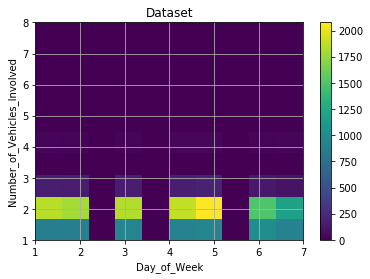

In [409]:
import numpy as np
import matplotlib.pyplot as plt
x1=data1['Number_of_Vehicles_Involved']
x2=data1['Day_of_Week']
##X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
  
#Visualizing the data 
plt.plot() 
plt.xlim([0, 10]) 
plt.ylim([0, 10]) 
plt.title('Dataset')
plt.xlabel('Day_of_Week')
plt.ylabel('Number_of_Vehicles_Involved')
plt.hist2d(x2, x1,)
plt.grid(True)
plt.colorbar()
plt.show()

In [410]:
cluster = data1[['Crash_Descriptor','Day_of_Week', 'Lighting_Conditions', 'Number_of_Vehicles_Involved']]

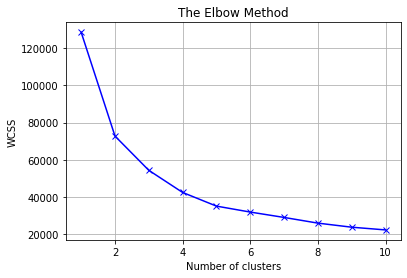

7

In [411]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(cluster)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.grid(True)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans.n_iter_

In [412]:
df2 = cluster.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis= 0)
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df2)
df2['cluster']=y_kmeans

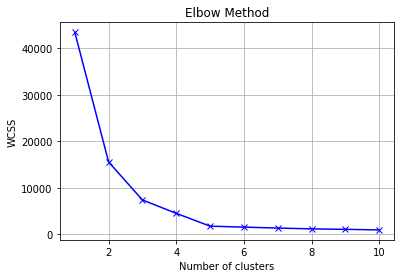

In [413]:
import plotly.offline as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.grid(True)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [418]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df2)
df2['cluster']=y_kmeans
kmeans.cluster_centers_

array([[9.31356497e-01, 7.32520769e-01, 7.53274513e-01, 1.19285844e-01,
        2.00000000e+00],
       [9.40093492e-01, 1.50341604e-01, 7.51995685e-01, 1.23624595e-01,
        8.77076189e-14],
       [4.02694999e-01, 4.52016930e-01, 7.50259134e-01, 1.11094658e-01,
        3.00000000e+00],
       [8.19711791e-01, 2.56337436e-01, 8.34648154e-02, 8.65527656e-02,
        4.00000000e+00],
       [8.04225352e-01, 8.25528169e-01, 8.56514085e-02, 8.49094567e-02,
        1.00000000e+00]])

In [419]:
df2.shape

(20000, 5)

In [428]:
import plotly.express as px

plt = px.scatter(df2, x="Day_of_Week", y="Lighting_Conditions", color="cluster",
                 size='Crash_Descriptor', hover_data=['Number_of_Vehicles_Involved'])
plt.show()

In [421]:

import plotly.graph_objs as go
trace1 = go.Scatter3d(
 x = df2['Day_of_Week'].values,
 y = df2['Lighting_Conditions'].values,
 z = df2['Number_of_Vehicles_Involved'].values,
 mode='markers',
 marker=dict(
 size=12,
 color=df2['cluster'].values,# set color to an array/list of desired values
 colorscale='Rainbow', # choose a colorscale
 opacity=0.8
 )

)
data = [trace1]
layout = go.Layout(
 scene=dict(
 xaxis=dict(title='day'),
 yaxis=dict(title='lighting'),
 zaxis=dict(title='number_of_accidents')
 ),
 margin=dict(
 l=0,
 r=0,
 b=0,
 t=0
 ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [427]:
 data1.groupby('Day_of_Week').sum()

Id     Year  Crash_Descriptor  Lighting_Conditions  \
Day_of_Week                                                             
1            29369084  5933244              9950                 9770   
2            28737719  5796292              9753                 9495   
3            30140420  6005748             10125                 9768   
4            30037399  6076238             10296                 9849   
5            32460769  6575710             11056                10433   
6            27046922  5391478              9018                 8165   
7            22197687  4501290              7540                 6637   

             Number_of_Vehicles_Involved  
Day_of_Week                               
1                                   5274  
2                                   5111  
3                                   5248  
4                                   5390  
5                                   5885  
6                                   4551  
7                                   3751